In [1]:
from pathlib import Path
from IPython.display import HTML, display
css = Path("../../../css/rtl.css").read_text(encoding="utf-8")
display(HTML(f"<style>{css}</style>"))

# فصل ۱ — مقدمه‌ای بر یادگیری ماشین
## درس ۱۲: مبانی بازتولیدپذیری (بذرهای تصادفی، تعیین‌پذیری، مفاهیم رهگیری آزمایش)

این نوت‌بوک بخشی از **دوره مقدماتی یادگیری ماشین** است.

**فرض‌های ساختار مخزن (Repository)**
- داده‌ها در `Datasets/...` قرار دارند
- نوت‌بوک‌ها در `Tutorials/English/...` و `Tutorials/Persian/...` قرار دارند
- فایل‌های CSS در `css/` قرار دارند و در ابتدای هر نوت‌بوک اعمال می‌شوند

> نکته مهم: در سلول‌های Markdown این دوره، فرمول‌های درون‌خطی به صورت `$ ... $` و فرمول‌های نمایشی به صورت `$$ ... $$` نوشته می‌شوند.



### اهداف یادگیری

در پایان این درس می‌توانید:

1. توضیح دهید «بازتولیدپذیری» در یادگیری ماشین چیست و چرا برای اعتبار نتایج ضروری است.
2. با استفاده از **بذر تصادفی** در Python، NumPy و scikit-learn تصادفی‌بودن را کنترل کنید (و محدودیت‌های بذر را بشناسید).
3. تفاوت «بازتولیدپذیری» و «تعیین‌پذیری» را درک کنید (و منابع رایج عدم‌تعیین‌پذیری را تشخیص دهید).
4. یک الگوی حداقلی **رهگیری آزمایش** پیاده‌سازی کنید: ثبت پارامترها، معیارها و مصنوعات (artifacts) به شکل ساخت‌یافته.
5. یک چک‌لیست عملی بازتولیدپذیری را در پروژه‌های خود به کار بگیرید.

### چرا این موضوع مهم است؟

نتایج یادگیری ماشین «فرایندی» هستند: به داده، پیش‌پردازش، آموزش، ارزیابی و محیط محاسباتی وابسته‌اند.  
اگر نتوانید نتیجه‌ای را بازتولید کنید، نمی‌توانید آن را با اطمینان عیب‌یابی کنید، مقایسه کنید، منتشر کنید یا به تولید (production) ببرید.

یک مدل ذهنی مفید:

- شما یک **پایپلاین** اجرا می‌کنید: $f(\text{data}, \text{code}, \text{randomness}, \text{environment}) \to (\text{metrics}, \text{model})$.
- بازتولیدپذیری یعنی بتوانید همان پایپلاین را دوباره اجرا کنید و همان خروجی‌ها (یا خروجی‌هایی با اختلاف قابل قبول) را بگیرید.



## ۱. بازتولیدپذیری در برابر تعیین‌پذیری

این دو مفهوم مرتبط‌اند اما یکسان نیستند.

### بازتولیدپذیری (عملی)

یک نتیجه «بازتولیدپذیر» است اگر بتوانید فرایند را دوباره اجرا کنید و به همان نتیجه‌گیری برسید.  
اغلب منظور «وزن‌های دقیقاً یکسان در سطح بیت» نیست، بلکه «معیارهای یکسان در حد تلرانس» و «تصمیم یکسان در انتخاب مدل» است.

### تعیین‌پذیری (فنی)

یک محاسبه «تعیین‌پذیر» است اگر برای یک ورودی ثابت، **دقیقاً** همان خروجی را هر بار تولید کند.

در عملِ ML:
- معمولاً می‌توان **تقسیم داده** و **پیش‌پردازش** را با بذرها تکرارپذیر کرد.
- اما تضمین **تعیین‌پذیری بیت‌به‌بیت** همیشه ممکن نیست (به علت رفتار اعشاری، موازی‌سازی، پیاده‌سازی کتابخانه‌ها و سخت‌افزار).

### یک سلسله‌مراتب عملی

1. **تقسیم و پیش‌پردازش تکرارپذیر** (shuffle با بذر، مهندسی ویژگی ثابت)
2. **آموزش تکرارپذیر** (کنترل مقداردهی اولیه و تصادفی‌بودن)
3. **ارزیابی تکرارپذیر** (مجموعه آزمون ثابت، آستانه ثابت، امتیازدهی ثابت)
4. **قابلیت ردیابی** (ثبت کارها برای توضیح و اجرای مجدد در آینده)



## ۲. بذرهای تصادفی: کنترل آگاهانه‌ی تصادفی‌بودن

بسیاری از مراحل ML تصادفی هستند:
- تقسیم train/test با درهم‌ریزی (shuffling)
- مقداردهی اولیه تصادفی (مثلاً مراکز اولیه در k-means)
- بهینه‌سازی تصادفی (مثلاً SGD)
- نمونه‌برداری تصادفی ویژگی‌ها (مثلاً Random Forest)

«بذر» یک مولد اعداد شبه‌تصادفی (PRNG) را مقداردهی اولیه می‌کند. با بذر ثابت، خروجی PRNG تکرار می‌شود.

### اصل کلیدی

بذرها فقط وقتی کمک می‌کنند که:
- الگوریتم واقعاً از همان PRNG استفاده کند، و
- عامل دیگری عدم‌تعیین‌پذیری ایجاد نکند (موازی‌سازی، کاهش‌های غیرهم‌بسته و غیره).

### PRNGهایی که باید بشناسید

- کتابخانه استاندارد Python: `random`
- NumPy: `np.random` (سراسری و قدیمی) و `np.random.default_rng()` (پیشنهادی)
- scikit-learn: در بسیاری از ابزارها/مدل‌ها پارامتر `random_state=` دارد



## ۳. منابع رایج عدم‌تعیین‌پذیری (حتی با بذر ثابت)

حتی با بذرهای ثابت هم ممکن است اختلاف بین اجراها ببینید. عوامل رایج:

1. **غیرهم‌بستگی محاسبات اعشاری**  
   به علت گرد کردن، $(a+b)+c$ می‌تواند با $a+(b+c)$ متفاوت باشد.
2. **اجرای موازی** (BLAS/OpenMP/MKL)  
   ترتیب کاهش‌ها (reductions) بین نخ‌ها می‌تواند تغییر کند.
3. **تصادفی‌سازی هش در Python**  
   ترتیب پیمایش دیکشنری/ست ممکن است بدون کنترل تغییر کند.
4. **تفاوت نسخه کتابخانه/کامپایلر/سخت‌افزار**  
   نسخه‌های متفاوت NumPy، scikit-learn، BLAS یا ویژگی‌های CPU می‌تواند عددی‌ها را تغییر دهد.
5. **تغییر داده**  
   اگر فایل داده تغییر کند، بذرها نمی‌توانند نتیجه قدیمی را «برگردانند».

جمع‌بندی عملی: هدف را روی **تکرارپذیری و قابلیت ردیابی** بگذارید، نه کمال.



## ۴. رهگیری آزمایش (مفاهیم)

رهگیری آزمایش یعنی بتوانید بعداً پاسخ دهید:

- چه داده‌ای استفاده شد؟
- چه کد و پارامترهایی اجرا شد؟
- چه معیارهایی به دست آمد؟
- فایل/مصنوع مدل آموزش‌دیده کجاست؟

حتی بدون ابزار تخصصی هم می‌توان با ثبت موارد زیر این کار را انجام داد:

- **پارامترها** (مثلاً `random_state` و ابرپارامترها)
- **معیارها** (accuracy، RMSE و غیره)
- **مصنوعات** (نمودارها، فایل مدل، فهرست ویژگی‌ها، هش داده)
- **محیط** (نسخه Python، نسخه کتابخانه‌ها)

ابزارهای تخصصی (MLflow، Weights & Biases، Neptune) این کار را خودکار می‌کنند،  
اما انضباط اصلی همان است.



## ۵. بخش عملی: الگوهای بازتولیدپذیری در کد

در این بخش سه نوع مثال عملی را می‌بینید:

1. **بازتولیدپذیری PRNG** (بذرگذاری NumPy و بررسی بصری با هیستوگرام).
2. **بازتولیدپذیری مدل** (کنترل تقسیم train/test و معیارهای ثابت).
3. **پایداری داده و پایپلاین** (تمیز کردن ستون‌های «کثیف» و رفع باگ‌های رایج بازتولیدپذیری).

### ۵.۱ تصادفی‌بودنِ بذرگذاری‌شده در NumPy

اگر قبل از تولید اعداد تصادفی، همان بذر را تنظیم کنید، باید همان دنباله تولید شود.

یک عادت خوب این است که از مولد محلی (`default_rng`) استفاده کنید و آن را در کد پاس دهید.


In [2]:
import numpy as np

# Example: same seed -> same pseudo-random numbers
np.random.seed(123)
x1 = np.random.normal(loc=0.0, scale=1.0, size=8)

np.random.seed(123)
x2 = np.random.normal(loc=0.0, scale=1.0, size=8)

print("x1 =", x1)
print("x2 =", x2)
print("All close?", np.allclose(x1, x2))

x1 = [-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025  1.65143654
 -2.42667924 -0.42891263]
x2 = [-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025  1.65143654
 -2.42667924 -0.42891263]
All close? True


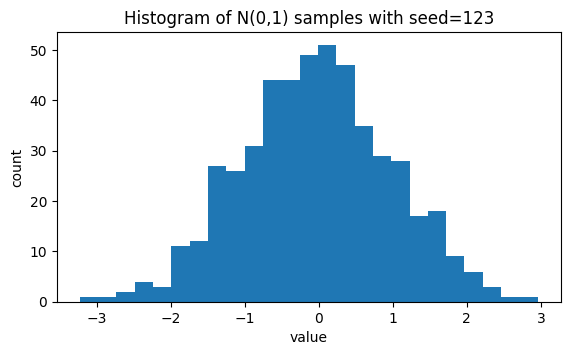

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)
sample = np.random.normal(size=500)

plt.figure(figsize=(6.5, 3.5))
plt.hist(sample, bins=25)
plt.title("Histogram of N(0,1) samples with seed=123")
plt.xlabel("value")
plt.ylabel("count")
plt.show()


### ۵.۲ الگوی پیشنهادی برای RNG

به جای تکیه بر حالت سراسری (`np.random.seed`)، از یک شیء `Generator` استفاده کنید.

این کار کمک می‌کند:
- تصادفی‌بودن را به یک آزمایش مشخص محدود کنید،
- از تداخل ناخواسته بخش‌های دیگر کد جلوگیری کنید،
- جریان تصادف را ثبت و بازپخش کنید.


In [4]:
import numpy as np

# Recommended modern pattern: use your own Generator (avoid global state)
rng = np.random.default_rng(2026)

print("Uniform(0,1):", rng.random(5))
print("Integers:", rng.integers(low=0, high=10, size=8))

# If you pass rng around, your pipeline becomes easier to reproduce.

Uniform(0,1): [0.17893481 0.63991317 0.4672684  0.37050053 0.35491733]
Integers: [8 7 7 9 7 1 8 6]



### ۵.۳ بارگذاری داده‌ها با مسیرهای نسبی پایدار

در این مخزن، داده‌ها با مسیرهای نسبی مثل زیر خوانده می‌شوند:

`../../../Datasets/Classification/iris.csv`

برای اینکه این نوت‌بوک خارج از مخزن هم قابل اجرا باشد (مثلاً در یک محیط مستقل)، کد زیر اگر فایل موجود نباشد از یک نمونه کوچک استفاده می‌کند.  
در مخزن واقعی شما، فایل باید موجود باشد و نوت‌بوک به طور خودکار از همان فایل استفاده می‌کند.


In [5]:
from pathlib import Path
import pandas as pd
from io import StringIO

path = Path("../../../Datasets/Classification/iris.csv")

if path.exists():
    iris = pd.read_csv(path)
else:
    iris = pd.read_csv(StringIO("""sepal_length,sepal_width,petal_length,petal_width,classification
5.4,3.7,1.5,0.2,Iris-setosa
4.8,3.4,1.6,0.2,Iris-setosa
4.8,3,1.4,0.1,Iris-setosa
4.3,3,1.1,0.1,Iris-setosa
5.8,4,1.2,0.2,Iris-setosa
"""))

print("Shape:", iris.shape)
print(iris.head().to_string(index=False))

Shape: (150, 5)
 sepal_length  sepal_width  petal_length  petal_width classification
          5.4          3.7           1.5          0.2    Iris-setosa
          4.8          3.4           1.6          0.2    Iris-setosa
          4.8          3.0           1.4          0.1    Iris-setosa
          4.3          3.0           1.1          0.1    Iris-setosa
          5.8          4.0           1.2          0.2    Iris-setosa



### ۵.۴ تقسیم train/test تکرارپذیر و آموزش مدل

یک باگ رایج بازتولیدپذیری این است که `random_state` را در موارد زیر تنظیم نکنید:

- `train_test_split(..., random_state=...)`
- مدل‌هایی که درونی تصادفی هستند (مثل ensembleهای درختی، k-means، حل‌کننده‌های تصادفی)

در کد زیر، یک پایپلاین را چند بار با بذرهای متفاوت آموزش می‌دهیم. انتظار می‌رود:

- بذرهای متفاوت دقت‌های متفاوت بدهند،
- تکرار همان بذر، همان دقت را بازگرداند.


In [6]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

X, y = make_classification(
    n_samples=500, n_features=8, n_informative=5, n_redundant=1,
    n_classes=2, flip_y=0.02, class_sep=1.2, random_state=7
)

def run(seed):
    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.25, random_state=seed, stratify=y)
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=200, solver="lbfgs"))
    ])
    pipe.fit(Xtr, ytr)
    pred = pipe.predict(Xte)
    return accuracy_score(yte, pred)

acc0 = run(0)
acc1 = run(1)
acc0_again = run(0)

print(f"Accuracy with seed=0: {acc0:.3f}")
print(f"Accuracy with seed=1: {acc1:.3f}")
print(f"Accuracy with seed=0 (repeat): {acc0_again:.3f}")

Accuracy with seed=0: 0.800
Accuracy with seed=1: 0.792
Accuracy with seed=0 (repeat): 0.800



#### ارزیابی دقیق‌تر

برای یک بذر ثابت (اینجا: `random_state=0`) می‌توان گزارش طبقه‌بندی را نیز چاپ کرد.


In [7]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X, y = make_classification(
    n_samples=500, n_features=8, n_informative=5, n_redundant=1,
    n_classes=2, flip_y=0.02, class_sep=1.2, random_state=7
)

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=200, solver="lbfgs"))
])

pipe.fit(Xtr, ytr)
pred = pipe.predict(Xte)

print(classification_report(yte, pred, digits=3))

              precision    recall  f1-score   support

           0      0.817     0.778     0.797        63
           1      0.785     0.823     0.803        62

    accuracy                          0.800       125
   macro avg      0.801     0.800     0.800       125
weighted avg      0.801     0.800     0.800       125




### ۵.۵ بازتولیدپذیری در کنار بهداشت داده: رفع ستون‌های بهم‌ریخته (hw_200.csv)

خیلی وقت‌ها مسئله «بازتولیدپذیری» در واقع یک مسئله **طرح‌واره داده (schema)** است.  
مثلاً کد شما انتظار ستون `"Height(Inches)"` را دارد، اما سربرگ CSV ممکن است کوتیشن/فاصله اضافه داشته باشد.

در این مخزن، `hw_200.csv` سربرگی دارد که می‌تواند نام ستون‌ها را غیرمنتظره کند.  
اگر خطاهایی مثل `KeyError: "Height(Inches)"` دیدید، باید ستون‌ها را بررسی و نرمال‌سازی کنید.

در کد زیر:
1) فایل (یا نمونه جایگزین) را می‌خوانیم،
2) نام ستون‌ها را نرمال می‌کنیم،
3) ستون‌ها را عددی می‌کنیم،
4) k-means را با `random_state` ثابت اجرا می‌کنیم.


In [8]:
from pathlib import Path
import pandas as pd
from io import StringIO

path = Path("../../../Datasets/Clustering/hw_200.csv")

if path.exists():
    hw = pd.read_csv(path)
else:
    hw = pd.read_csv(StringIO('''"Index", Height(Inches)", "Weight(Pounds)"
1, 65.78, 112.99
2, 71.52, 136.49
3, 69.40, 153.03
4, 68.22, 142.34
5, 67.79, 144.30
6, 68.70, 123.30
'''), engine="python", skipinitialspace=True)

# Normalize column names (remove quotes/spaces)
hw.columns = [c.strip().strip('"').strip() for c in hw.columns]
hw = hw.rename(columns={c: c.replace('Height(Inches)"', 'Height(Inches)') for c in hw.columns})

# Convert numeric columns safely
for c in hw.columns:
    hw[c] = pd.to_numeric(hw[c], errors="coerce")

print("Columns:", list(hw.columns))
print(hw.head().to_string(index=False))

Columns: ['Index', 'Height(Inches)', 'Weight(Pounds)']
 Index  Height(Inches)  Weight(Pounds)
     1           65.78          112.99
     2           71.52          136.49
     3           69.40          153.03
     4           68.22          142.34
     5           67.79          144.30


In [9]:
import numpy as np
from sklearn.cluster import KMeans

X_hw = hw[["Height(Inches)", "Weight(Pounds)"]].values.astype(float)

km = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = km.fit_predict(X_hw)

print("Cluster centers (random_state=42):")
print(km.cluster_centers_)
print("Inertia:", km.inertia_)
print("Label counts:", dict(zip(*np.unique(labels, return_counts=True))))

Cluster centers (random_state=42):
[[ 68.75776786 135.68151786]
 [ 66.92147727 116.45522727]]
Inertia: 10836.546087337665
Label counts: {np.int32(0): np.int64(112), np.int32(1): np.int64(88)}



#### تغییر بذر، خروجی را عوض می‌کند

k-means از مقداردهی اولیه تصادفی استفاده می‌کند (مگر اینکه مقداردهی اولیه را کاملاً کنترل کنید).  
تغییر `random_state` می‌تواند جواب را عوض کند، مخصوصاً وقتی چند مینیمم محلی وجود دارد.

این «باگ» نیست؛ ویژگی الگوریتم است.  
برای گزارش‌های تکرارپذیر، همیشه بذر را ثبت کنید و چند بار مقداردهی اولیه (initialization) را امتحان کنید.


In [10]:
import numpy as np
from sklearn.cluster import KMeans

X_hw = hw[["Height(Inches)", "Weight(Pounds)"]].values.astype(float)

km1 = KMeans(n_clusters=2, random_state=42, n_init=10)
lab1 = km1.fit_predict(X_hw)

km2 = KMeans(n_clusters=2, random_state=1, n_init=10)
lab2 = km2.fit_predict(X_hw)

print("Centers with random_state=42:")
print(km1.cluster_centers_)
print("Centers with random_state=1:")
print(km2.cluster_centers_)

Centers with random_state=42:
[[ 68.75776786 135.68151786]
 [ 66.92147727 116.45522727]]
Centers with random_state=1:
[[ 68.75776786 135.68151786]
 [ 66.92147727 116.45522727]]



## ۶. تعیین‌پذیری در عمل: اعشاری و موازی‌سازی

حتی اگر همه بذرها را تنظیم کنید، ممکن است اختلاف‌های عددی کوچک ببینید.  
یکی از دلایل بنیادی این است که جمع اعشاری هم‌بسته نیست:

$$
(a+b)+c \neq a+(b+c)
$$

مثال زیر یک نمایش کلاسیک با اعداد خیلی بزرگ و خیلی کوچک است.


In [11]:
# Floating-point non-associativity demo
a, b, c = 1e16, -1e16, 1.0

left = (a + b) + c
right = a + (b + c)

print("(a + b) + c =", left)
print("a + (b + c) =", right)
print("Equal?", left == right)

(a + b) + c = 1.0
a + (b + c) = 0.0
Equal? False



### ۶.۱ کنترل نخ‌ها (در حد امکان)

روی CPU، بسیاری از کتابخانه‌های عددی از چندنخی استفاده می‌کنند. زمان‌بندی متفاوت نخ‌ها می‌تواند ترتیب عملیات را تغییر دهد و در نتیجه خروجی اعشاری اندکی فرق کند.

اگر حداکثر تکرارپذیری می‌خواهید، می‌توانید (مثلاً) `OMP_NUM_THREADS=1` و `MKL_NUM_THREADS=1` را قبل از اجرای Python تنظیم کنید.

سلول زیر این متغیرهای محیطی را چاپ می‌کند تا پیکربندی را بررسی کنید.


In [12]:
import os, sys
import numpy as np

print("Python:", sys.version.split()[0])
print("NumPy:", np.__version__)

# Thread control (best effort). For strict control, set these *before* importing NumPy in a fresh process.
for k in ["OMP_NUM_THREADS", "MKL_NUM_THREADS", "OPENBLAS_NUM_THREADS", "NUMEXPR_NUM_THREADS"]:
    print(f"{k} =", os.environ.get(k))

print("\nTip: For maximum repeatability on CPU, you can set these env vars to 1 and rerun the notebook kernel.")

Python: 3.13.0
NumPy: 2.1.2
OMP_NUM_THREADS = None
MKL_NUM_THREADS = None
OPENBLAS_NUM_THREADS = None
NUMEXPR_NUM_THREADS = None

Tip: For maximum repeatability on CPU, you can set these env vars to 1 and rerun the notebook kernel.



## ۷. نسخه‌بندی داده: بذرها ورودیِ تغییر کرده را درست نمی‌کنند

بذر فقط جریان PRNG را کنترل می‌کند و تضمین نمی‌کند **داده** همان باشد.

یک روش حداقلی این است که از فایل داده یک هش رمزنگاری (مثلاً SHA-256) حساب کنید و در لاگ آزمایش ذخیره کنید.  
اگر هش عوض شود، یعنی ورودی عوض شده است.

سلول بعدی هش دو مسیر داده را (اگر در محیط شما موجود باشند) حساب می‌کند.


In [13]:
from pathlib import Path
from hashlib import sha256

def file_sha256(path: Path, chunk_size: int = 1024 * 1024) -> str:
    h = sha256()
    with path.open("rb") as f:
        while True:
            chunk = f.read(chunk_size)
            if not chunk:
                break
            h.update(chunk)
    return h.hexdigest()

iris_path = Path("../../../Datasets/Classification/iris.csv")
listings_path = Path("../../../Datasets/Regression/listings.csv")

for p in [iris_path, listings_path]:
    if p.exists():
        print(p, file_sha256(p)[:16])
    else:
        print(p, "(missing in this environment)")

..\..\..\Datasets\Classification\iris.csv c21556846e28c14f
..\..\..\Datasets\Regression\listings.csv 2c83127e32a85b59



## ۸. یک رهگیر حداقلی آزمایش (لاگ‌های JSON)

در کد زیر یک «رهگیر» کوچک داریم که برای هر اجرا یک فایل JSON می‌نویسد. این جایگزین ابزارهای حرفه‌ای نیست، اما *مفهوم* را نشان می‌دهد:

- ساخت یک شناسه اجرا (run id)
- ذخیره پارامترها، معیارها و یادداشت‌ها
- ذخیره اطلاعات محیط
- نوشتن فایل در پوشه runs

با اجرای مجدد، یک run id جدید و یک فایل JSON جدید خواهید داشت؛ یعنی یک ردپای قابل بازرسی (audit trail).


In [14]:
from dataclasses import dataclass, asdict
from pathlib import Path
import json
import time
import platform
import sys

@dataclass
class RunLog:
    run_id: str
    start_time_utc: str
    params: dict
    metrics: dict
    notes: str = ""

class SimpleTracker:
    """A minimal experiment tracker that logs runs to a folder as JSON."""
    def __init__(self, root="runs"):
        self.root = Path(root)
        self.root.mkdir(parents=True, exist_ok=True)

    def new_run_id(self):
        return time.strftime("%Y%m%d-%H%M%S")

    def log_run(self, params: dict, metrics: dict, notes: str = "") -> Path:
        run_id = self.new_run_id()
        run = RunLog(
            run_id=run_id,
            start_time_utc=time.strftime("%Y-%m-%dT%H:%M:%SZ", time.gmtime()),
            params=params,
            metrics=metrics,
            notes=notes
        )
        payload = asdict(run)
        payload["environment"] = {
            "python": sys.version.split()[0],
            "platform": platform.platform(),
        }
        out_path = self.root / f"{run_id}.json"
        out_path.write_text(json.dumps(payload, indent=2), encoding="utf-8")
        return out_path

tracker = SimpleTracker(root="runs_demo")
path = tracker.log_run(
    params={"example": "logistic_regression", "seed": 0},
    metrics={"accuracy": 0.0},
    notes="This is a minimal JSON log. Extend it with dataset hashes, artifacts, and git commit ids."
)
print("Wrote:", path)
print("Folder contains:", [p.name for p in sorted(Path('runs_demo').glob('*.json'))][-3:])

Wrote: runs_demo\20260102-192113.json
Folder contains: ['20260102-192113.json']



## ۹. چک‌لیست بازتولیدپذیری (عملی)

وقتی نتیجه‌ای می‌خواهید که به آن اعتماد کنید و قابل بازتولید باشد، از این چک‌لیست استفاده کنید.

### کنترل تصادفی‌بودن
- یک منبع واحد تصادف داشته باشید (ترجیحاً `np.random.default_rng(seed)`).
- برای ابزارها/مدل‌های scikit-learn که تصادفی هستند `random_state=...` را تنظیم کنید.
- برای k-means این موارد را ثبت کنید: `random_state`، `n_init` و نسخه scikit-learn.

### کنترل داده
- مسیرهای داده را ثبت کنید و هش فایل‌ها را حساب کنید (یا از ابزارهای نسخه‌بندی داده استفاده کنید).
- از نشت اطلاعات (leakage) جلوگیری کنید: قبل از split روی کل داده آمار محاسبه نکنید.
- split را متناسب با مسئله پایدار کنید: group split یا temporal split در صورت نیاز.

### کنترل محیط
- نسخه Python و بسته‌ها را ثبت کنید.
- در صورت نیاز برای تعیین‌پذیری بیشتر نخ‌ها را محدود کنید.
- اگر از GPU استفاده می‌کنید، تنظیمات تعیین‌پذیری مخصوص فریم‌ورک را بررسی کنید.

### رهگیری و گزارش‌دهی
- برای هر اجرا پارامترها، معیارها و مصنوعات را لاگ کنید.
- در صورت نیاز، مدل و پایپلاین پیش‌پردازش را ذخیره کنید.
- در گزارش‌ها و README یک «یادداشت بازتولیدپذیری» کوتاه اضافه کنید.



## ۵. تمرین و فعالیت‌ها

1. بذر تقسیم داده را تغییر دهید و ببینید accuracy عوض می‌شود.
2. پایپلاین را با cross-validation قوی‌تر کنید و میانگین و انحراف معیار را رهگیری کنید.
3. هش مجموعه‌داده را از روی فایل CSV واقعی در مخزن خود محاسبه و در لاگ ثبت کنید.
4. رهگیر را طوری توسعه دهید که مدل فیت‌شده را هم با `joblib.dump()` ذخیره کند.
5. یک «یادداشت بازتولیدپذیری» کوتاه برای یک گزارش فرضی بنویسید: نسخه داده، بذر split، مدل و معیارها.


In [15]:
print("End of Lesson 12 — Reproducibility Basics")

End of Lesson 12 — Reproducibility Basics
